In [25]:
import os
import pandas as pd

base_path = '/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam'
classes = []
class_counts = []

for root, dirs, files in os.walk(base_path):
    if root != base_path and len(dirs) == 0 and files:  
        cls_name = os.path.basename(root)
        img_count = sum(1 for f in files if f.lower().endswith(('.png','.jpg','.jpeg')))
        classes.append(cls_name)
        class_counts.append(img_count)

df_stats = pd.DataFrame({'class': classes, 'samples': class_counts})
print(df_stats.sort_values('samples', ascending=False))

           class  samples
1         galaxy     3984
5           star     3269
6  constellation     1552
0         planet     1472
7         nebula     1192
2     black hole      656
4          comet      416
3       asteroid      283


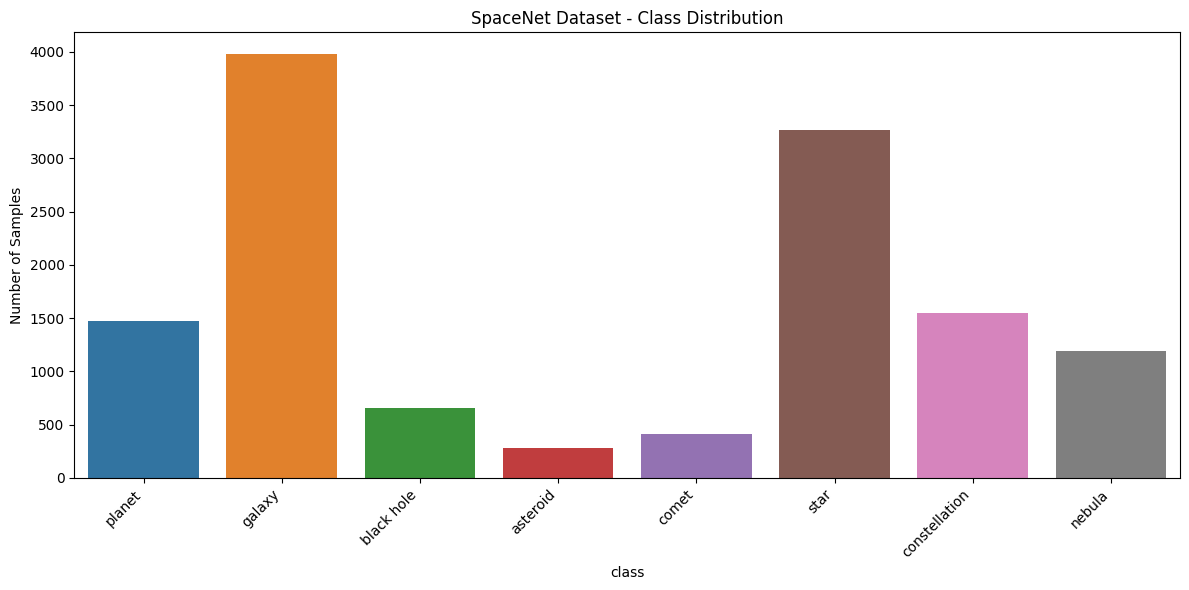

Imbalance ratio: 14.08


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=df_stats, x='class', y='samples')
plt.title('SpaceNet Dataset - Class Distribution')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Imbalance ratio
imbalance_ratio = df_stats['samples'].max() / df_stats['samples'].min()
print(f"Imbalance ratio: {imbalance_ratio:.2f}")


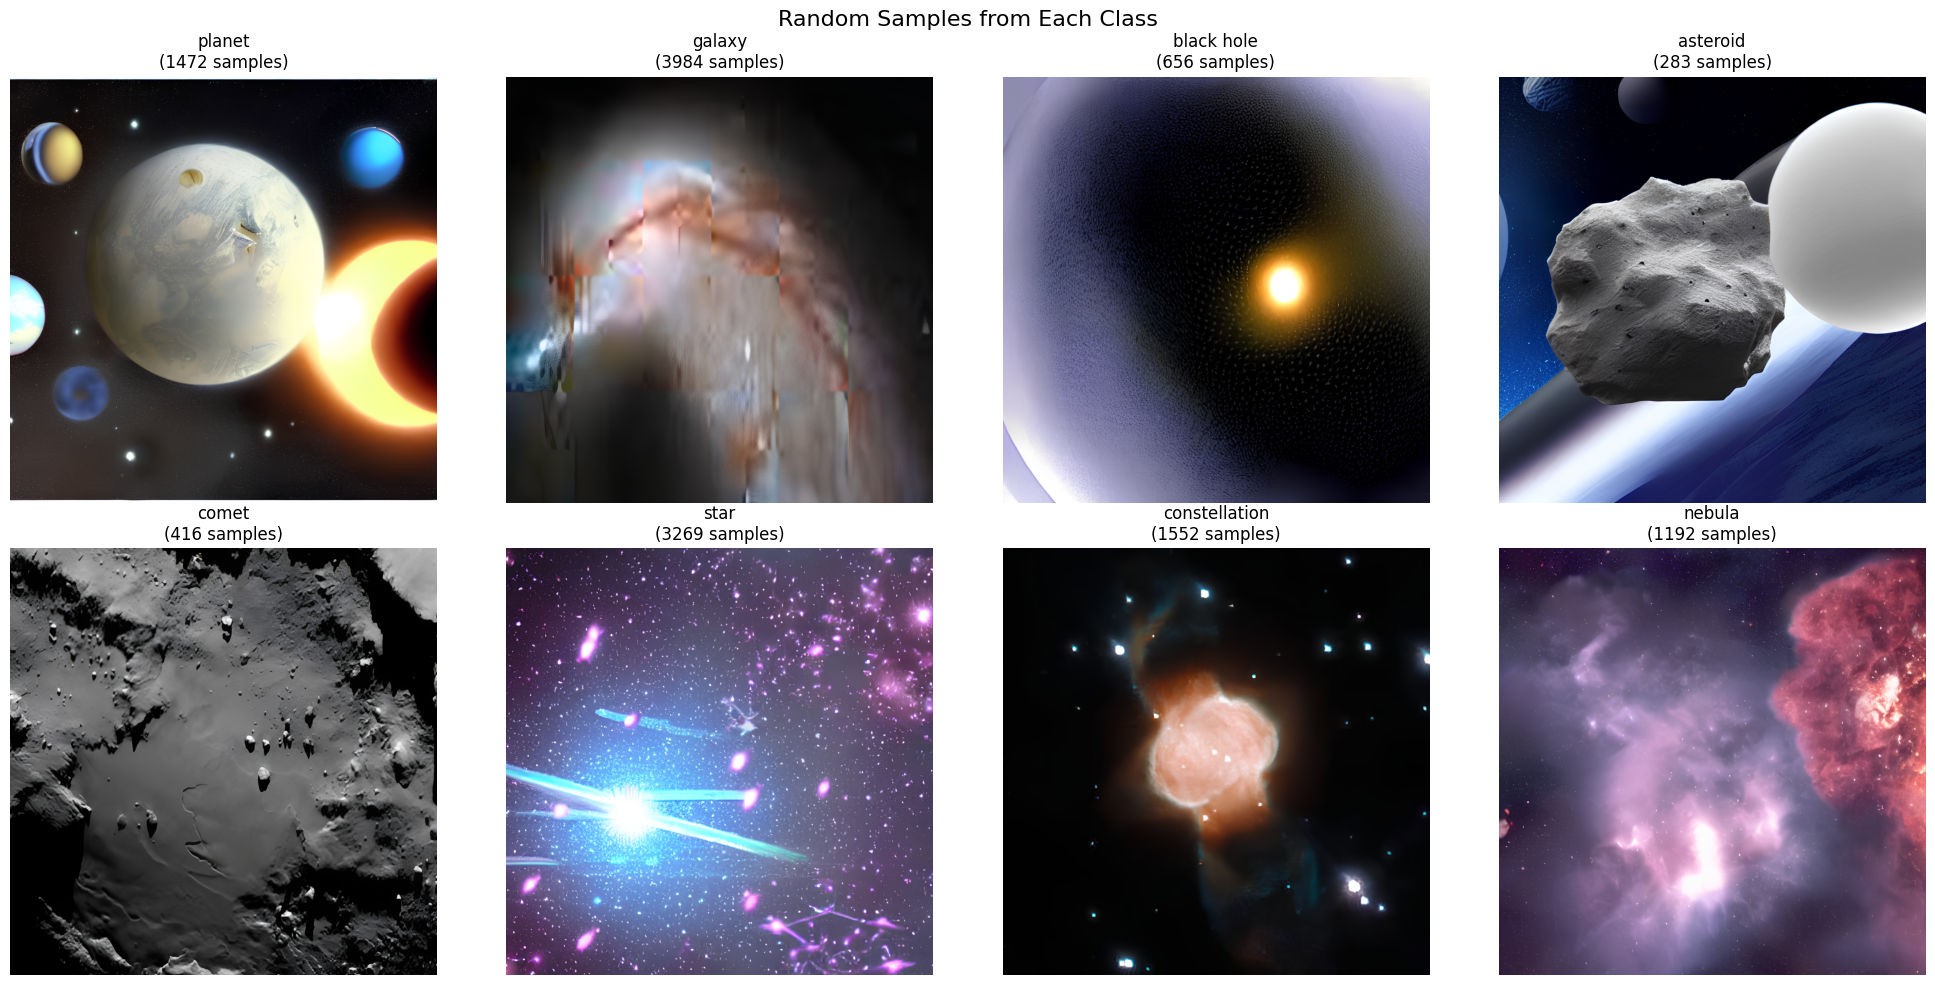

In [27]:
from PIL import Image
import matplotlib.pyplot as plt
import random

fig, axes = plt.subplots(2, len(classes)//2 + len(classes)%2, figsize=(20,10))
axes = axes.flatten() if len(classes) > 1 else [axes]

for idx, cls in enumerate(classes):
    cls_path = os.path.join(base_path, cls)
    img_files = [f for f in os.listdir(cls_path) if f.lower().endswith(('.png','.jpg'))]
    sample_file = random.choice(img_files)
    
    img = Image.open(os.path.join(cls_path, sample_file))
    axes[idx].imshow(img)
    axes[idx].set_title(f'{cls}\n({class_counts[idx]} samples)')
    axes[idx].axis('off')

plt.suptitle('Random Samples from Each Class', fontsize=16)
plt.tight_layout()
plt.show()


In [28]:
resolutions = []
formats = []
file_types = []

for cls in classes[:3]:  # Sample first 3 classes
    cls_path = os.path.join(base_path, cls)
    img_files = os.listdir(cls_path)[:10]  # 10 images per class
    
    for img_file in img_files:
        try:
            img_path = os.path.join(cls_path, img_file)
            with Image.open(img_path) as img:
                resolutions.append(img.size)
                formats.append(img.format)
                file_types.append(img_file.split('.')[-1].lower())
        except:
            continue

print("Resolution distribution:\n", pd.Series(resolutions).value_counts().head())
print("\nFormats:", pd.Series(formats).value_counts())
print("\nFile extensions:", pd.Series(file_types).value_counts())


Resolution distribution:
 (2048, 2048)    28
Name: count, dtype: int64

Formats: PNG    28
Name: count, dtype: int64

File extensions: png    28
Name: count, dtype: int64
